# Quantum Teleportation:
Without going into much detail, let's discuss only a tricky part of this topic (where I stambled to be more specific!)

Below are 4 Bell states which are maximally entangled and build on a orthogonal basis:
- <ψ<sup>00</sup>> = $\frac{1}{\sqrt{2}}$ * (|00> + |11>)     
- <ψ<sup>10</sup>> = $\frac{1}{\sqrt{2}}$ * (|00> - |11>)  
- <ψ<sup>01</sup>> = $\frac{1}{\sqrt{2}}$ * (|01> + |10>)  
- <ψ<sup>11</sup>> = $\frac{1}{\sqrt{2}}$ * (|01> - |10>)  


So, the general state can be written as:  <ψ<sup>ij</sup>> = (I<sub>2</sub> $\bigotimes$ $\sigma$<sub>x</sub><sup>j</sup>> $\sigma$<sub>z</sub><sup>i</sup>>) <ψ<sup>00</sup>> 

## Discussion

Alice and Bob both shares a maximally entangled state. i.e: some <ψ<sup>ij</sup>> where i == j == 0 for our example ==> <ψ<sup>00</sup>><sub>AB</sub>

Consider a qubit S that Alice possesses, which is in the following state:

|$\phi$⟩<sub>s</sub> = α|0⟩<sub>s</sub> +β|1⟩<sub>s</sub>

The combined state of SAB:
|$\phi$⟩ $\bigotimes$  <ψ<sup>00</sup>><sub>AB</sub> ==> <ψ<sup>ij</sup>><sub>AS</sub>&ensp;$\sigma$<sub>x</sub><sup>j</sup> $\sigma$<sub>z</sub><sup>i</sup>&ensp;|$\phi$⟩<sub>B</sub>
 
Alice performs a Bell measurement on her qubit of a shared state and the state she want to send to Bob. After measurment Alice's state AS will collapse to the one of the following states. (Note: this can be shown by re arranging the combined state of SAB, spaces are added for a better look and understanding): 
- <ψ<sup>00</sup>><sub>AS</sub>&ensp;$\sigma$<sub>x</sub><sup>0</sup> $\sigma$<sub>z</sub><sup>0</sup>&ensp;|$\phi$⟩<sub>B</sub>
- <ψ<sup>01</sup>><sub>AS</sub>&ensp;$\sigma$<sub>x</sub><sup>1</sup> $\sigma$<sub>z</sub><sup>0</sup>&ensp;|$\phi$⟩<sub>B</sub>
- <ψ<sup>10</sup>><sub>AS</sub>&ensp;$\sigma$<sub>x</sub><sup>0</sup> $\sigma$<sub>z</sub><sup>1</sup>&ensp;|$\phi$⟩<sub>B</sub>
- <ψ<sup>11</sup>><sub>AS</sub>&ensp;$\sigma$<sub>x</sub><sup>1</sup> $\sigma$<sub>z</sub><sup>1</sup>&ensp;|$\phi$⟩<sub>B</sub>

## Tricky part:
- Bell measurement on Alice side gets performed on state A and S only
- So, XOR with Hadamard on Alice's qubits will give her classical bits i and j (after Bell measurement on SA)
- Apparently Bob's qubit's state can be describe using a general version ==>  $\sigma$<sub>x</sub><sup>j</sup> $\sigma$<sub>z</sub><sup>i</sup>&ensp;|$\phi$⟩<sub>B</sub> (due to combined state of SAB)
- Now, we have i and j, and Bob's state
- After Bell measurement, Alice's state will get collapsed to one of the 4 possible states and Bob will get i and j values (Alice's both qubit gets destroyed, of course!)
- After Bell measurement, Alice will know the exact values of i and j and set them to Bob
- So, now Bob has i and j values (sent by Alice). In order to convert Bob's state to |$\phi$⟩<sub>B</sub>, Bob requires to perform some calculation
- Those calculations depends on the values of i and j (sent by Alice). Let's see Bob's state ==> $\sigma$<sub>x</sub><sup>j</sup> $\sigma$<sub>z</sub><sup>i</sup>&ensp;|$\phi$⟩<sub>B</sub>
- Bob will use i and j given by Alcie to convert his state to |$\phi$⟩<sub>B</sub> 
- Why? Well, if we apply same gate twice, we will get the original state back i.e: |$\phi$⟩<sub>B</sub>

Let's start with our imports!

In [2]:
# Diable warnings:
import warnings
warnings.filterwarnings(action='ignore')

from math import sqrt
from qiskit import *
from qiskit.tools.visualization import plot_histogram

from matplotlib import style
style.use('grayscale') # suitable for both JupyterLab themes

Alice wants to send the following state (unknown to her) to Bob's qubit:

$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$

The APIs we need to implement:
- create_entanglement(q_circuit, alice_qubit, bob_qubit) --> Creates entanglement between Alice's and Bob's qubit
- perform_bell_measurement(q_circuit, traveller_state_qubit, alice_entangled_qubit) --> Performs a Bell measurement on traveller_state_qubit and alice_entangled_qubit
- perform_operation_on_bob_qubit(q_circuit, bob_qubit, i, j) --> Performs $\sigma$<sub>x</sub><sup>j</sup> $\sigma$<sub>z</sub><sup>i</sup> on Bob's qubit

Now, let's implement these 3 APIs

In [3]:
def create_entanglement(q_circuit, alice_qubit, bob_qubit):
    """Creates entanglement between Alice's and Bob's qubit."""
    q_circuit.h(alice_qubit)
    q_circuit.cx(control_qubit=alice_qubit, target_qubit=bob_qubit)
    q_circuit.barrier()


def perform_bell_measurement(q_circuit, traveller_state_qubit, alice_entangled_qubit, alice_cbit_s, alice_cbit_a):
    """Performs a Bell measurement on traveller_state_qubit and alice_entangled_qubit."""
    q_circuit.cx(control_qubit=traveller_state_qubit, target_qubit=alice_entangled_qubit)
    q_circuit.h(traveller_state_qubit)
    q_circuit.barrier()
    q_circuit.measure(qubit=traveller_state_qubit, cbit=alice_cbit_s)
    q_circuit.measure(qubit=alice_entangled_qubit, cbit=alice_cbit_a)
    q_circuit.barrier()


def perform_operation_on_bob_qubit(q_circuit, bob_qubit, creg_i, creg_j):
    """Apply sigma-X, sigma-Z gates on Bob's qubit depending on the values of i, j."""
    q_circuit.x(bob_qubit).c_if(creg_j, 1)
    q_circuit.z(bob_qubit).c_if(creg_i, 1)
    q_circuit.barrier()


Let's use above APIs and complete qunatum teleportation!

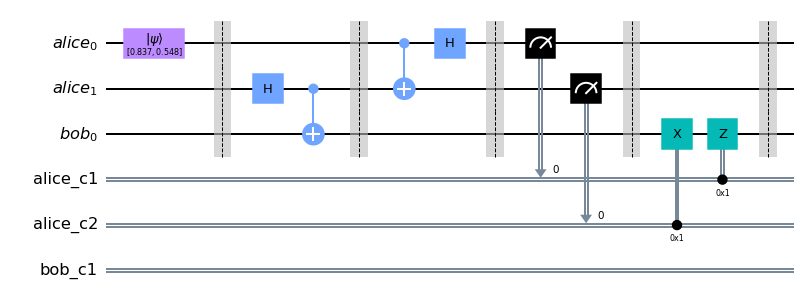

In [4]:
# Load q_circuit with all needed qregs and cregs
alice_qreg = QuantumRegister(2, name='alice')
alice_qubit_s = alice_qreg[0]
alice_qubit_a= alice_qreg[1]

alice_creg_s = ClassicalRegister(1, name='alice_c1')
alice_creg_a = ClassicalRegister(1, name='alice_c2')

bob_qreg = QuantumRegister(1, name='bob')
bob_qubit_b = bob_qreg[0]

bob_creg = ClassicalRegister(1, name='bob_c1')

q_circuit = QuantumCircuit(alice_qreg, bob_qreg, alice_creg_s, alice_creg_a, bob_creg)

# initialize traveller state in alice_qubit_s
traveler_state = [sqrt(0.70), sqrt(0.30)]
q_circuit.initialize(traveler_state, alice_qubit_s)
q_circuit.barrier()


# entangle
create_entanglement(
    q_circuit=q_circuit, 
    alice_qubit=alice_qubit_a, 
    bob_qubit=bob_qubit_b,
)

# Bell measurement
perform_bell_measurement(
    q_circuit=q_circuit,
    traveller_state_qubit=alice_qubit_s,
    alice_entangled_qubit=alice_qubit_a,
    alice_cbit_s=alice_creg_s,
    alice_cbit_a=alice_creg_a,
)

# operation on Bob's side depending on i and j
perform_operation_on_bob_qubit(
    q_circuit=q_circuit,
    bob_qubit=bob_qubit_b,
    creg_i=alice_creg_s,
    creg_j=alice_creg_a,
)

q_circuit.draw('mpl')


Now, let's simulate our circuit on QASM simulator

{'0 0 0': 517, '0 0 1': 490, '0 1 0': 518, '0 1 1': 523}


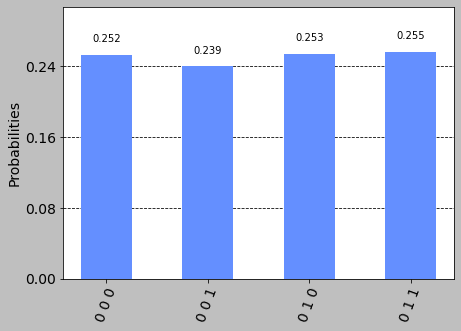

In [5]:
qasm_simulator = Aer.get_backend(name='qasm_simulator')
sv_simulator = Aer.get_backend(name='statevector_simulator')

qasm_result = execute(
    experiments=q_circuit,
    backend=qasm_simulator,
    shots=2048,
).result()

print(qasm_result.get_counts())
plot_histogram(data=qasm_result.get_counts())

Now, let's simulate our circuit on State Vector simulator

Bob's state: [ 0.        +0.00000000e+00j -0.        +0.00000000e+00j
  0.83666003+0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.54772256-6.70766677e-17j -0.        +0.00000000e+00j]


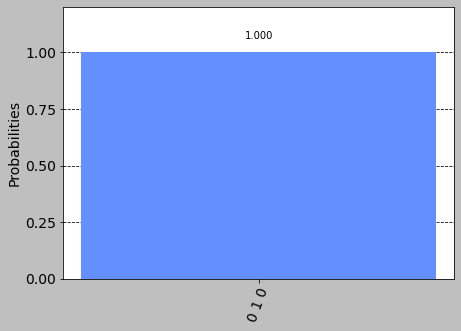

In [6]:
# q_circuit.measure(qubit=bob_qubit_b, cbit=bob_creg)
sv_simulator = Aer.get_backend(name='statevector_simulator')

sv_result = execute(
    experiments=q_circuit,
    backend=sv_simulator,
    shots=2048,
).result()

print("Bob's state:", sv_result.get_statevector())
plot_histogram(data=sv_result.get_counts())